In [1]:
import pandas as pd

# Importing Dataset
### Here first step is to collect data and import data

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [3]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
y = dataset['Exited']

In [6]:
X = dataset[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

In [7]:
X.shape

(10000, 8)

# Step2: Feture Engineering
## OneHostEncoding on Geography

In [8]:
Geo = pd.get_dummies(dataset['Geography'], drop_first=True)

In [9]:
Geo

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


## OneHotEncoding Gender

In [10]:
Gender = pd.get_dummies(dataset['Gender'], drop_first=True)

In [11]:
Gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [12]:
X = pd.concat([X,Geo,Gender], axis=1)

In [13]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


# Split the dataset into train and test

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=40)

# Import sequential Model From Keras

In [21]:
from keras.models import Sequential
model = Sequential()

# Import Dense
  Used to add neuron layer

In [22]:
from keras.layers import Dense

### First Layer
#### Neurons=10, input_fetures=11 and activation_function=relu(rectified linear unit)

In [23]:
model.add(Dense(units=10, activation='relu', input_dim=11))

# Second Layer
#### Neurons=8, activation_funtion = 'relu

In [24]:
model.add(Dense(units=8, activation='relu'))

# To check Model Information

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
Total params: 208
Trainable params: 208
Non-trainable params: 0
_________________________________________________________________


# Layer Three
#### units=6 activation='relu'

In [27]:
model.add(Dense(units=6, activation='relu'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
Total params: 262
Trainable params: 262
Non-trainable params: 0
_________________________________________________________________


# Last Layer
#### Units= 1 and activation='sigmoid'

In [29]:
model.add(Dense(units=1, activation='sigmoid'))

In [30]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'units': 10,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 8,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initial

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________


In [33]:
from keras.optimizers import Adam

In [34]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.00001))

In [35]:
model.get_weights()

[array([[ 0.516934  , -0.04073495,  0.19664681,  0.23998845,  0.42411488,
         -0.44763753,  0.45498878,  0.32137883,  0.05464631, -0.40650302],
        [ 0.21845156,  0.4020657 ,  0.5037516 ,  0.4096058 , -0.08631849,
          0.49408358,  0.36419713,  0.00197494,  0.22873074, -0.44990492],
        [-0.23349789, -0.05715802,  0.44061708,  0.4101035 ,  0.25148314,
         -0.0748615 , -0.1156106 , -0.46702397, -0.12713283, -0.41611993],
        [-0.30577606,  0.25698322, -0.10939023, -0.11453792,  0.10239989,
         -0.43729752, -0.18739453,  0.06406707, -0.4730571 ,  0.13935894],
        [ 0.13764042,  0.04260767, -0.51415795, -0.44896632,  0.0276081 ,
          0.3288241 ,  0.43924892,  0.47675437,  0.47702712, -0.528505  ],
        [ 0.17030191,  0.17860043,  0.25487137,  0.39801604,  0.18940187,
          0.4531818 ,  0.27292007, -0.38608   , -0.16141841, -0.37530047],
        [-0.08774441,  0.23522711, -0.46971548,  0.2093767 ,  0.00779235,
          0.41418374, -0.4090096

In [36]:
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
250/250 [==============================] - 0s 1ms/step - loss: 938.7706
Epoch 2/200
250/250 [==============================] - 0s 1ms/step - loss: 882.6556
Epoch 3/200
250/250 [==============================] - 0s 1ms/step - loss: 828.7436
Epoch 4/200
250/250 [==============================] - 0s 1ms/step - loss: 777.8787
Epoch 5/200
250/250 [==============================] - 0s 1ms/step - loss: 729.1872
Epoch 6/200
250/250 [==============================] - 0s 1ms/step - loss: 682.3094
Epoch 7/200
250/250 [==============================] - 0s 1ms/step - loss: 637.4617
Epoch 8/200
250/250 [==============================] - 0s 1ms/step - loss: 594.4140A: 0s - loss: 625.0
Epoch 9/200
250/250 [==============================] - 0s 1ms/step - loss: 553.0309
Epoch 10/200
250/250 [==============================] - 0s 1ms/step - loss: 513.0161
Epoch 11/200
250/250 [==============================] - 0s 1ms/step - loss: 474.3973
Epoch 12/200
250/250 [==============================] -

Epoch 98/200
250/250 [==============================] - 0s 1ms/step - loss: 5.7937
Epoch 99/200
250/250 [==============================] - 0s 1ms/step - loss: 5.6206
Epoch 100/200
250/250 [==============================] - 0s 1ms/step - loss: 5.4269
Epoch 101/200
250/250 [==============================] - 0s 1ms/step - loss: 5.2158
Epoch 102/200
250/250 [==============================] - 0s 1ms/step - loss: 5.0051
Epoch 103/200
250/250 [==============================] - 0s 1ms/step - loss: 4.7936
Epoch 104/200
250/250 [==============================] - 0s 1ms/step - loss: 4.5855
Epoch 105/200
250/250 [==============================] - 0s 1ms/step - loss: 4.3733
Epoch 106/200
250/250 [==============================] - 0s 1ms/step - loss: 4.1415
Epoch 107/200
250/250 [==============================] - 0s 1ms/step - loss: 3.8964
Epoch 108/200
250/250 [==============================] - 0s 1ms/step - loss: 3.6312
Epoch 109/200
250/250 [==============================] - ETA: 0s - loss: 3.354

Epoch 195/200
250/250 [==============================] - 0s 1ms/step - loss: 0.6262
Epoch 196/200
250/250 [==============================] - 0s 1ms/step - loss: 0.6235
Epoch 197/200
250/250 [==============================] - 0s 1ms/step - loss: 0.6291
Epoch 198/200
250/250 [==============================] - 0s 1ms/step - loss: 0.6180
Epoch 199/200
250/250 [==============================] - 0s 1ms/step - loss: 0.6219
Epoch 200/200
250/250 [==============================] - 0s 1ms/step - loss: 0.6196


In [37]:
loss = pd.DataFrame(model.history.history)

In [38]:
loss

,loss
0,938.770569
1,882.655640
2,828.743591
3,777.878662
4,729.187195
...,...
195,0.623540
196,0.629116
197,0.618005
198,0.621900


<AxesSubplot:>

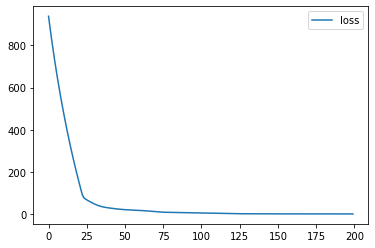

In [39]:
loss.plot()

In [40]:
model.predict(X_test)

array([[0.30970538],
       [0.20104456],
       [0.20572245],
       ...,
       [0.16678157],
       [0.16672221],
       [0.12625766]], dtype=float32)